In [9]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [10]:
# Importing self-made libaries

import reload_lib as rl
import sensitivity as st
import life_cycle_assessment as lc
import lcia_results as lr
import non_bio_co2 as nbc
import standards as s
import import_ecoinvent_and_databases as ied
import results_figures as rfig


lib = [lc, lr, nbc, s, ied, rfig, st]
rl.reload_lib(lib)

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
Recipe is selected
Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: cs

Writing activities to SQLite3 database:


Unlinked items after matching ev391apos: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_apos'}]
Applying strategy: link_iterable_by_fields
23 datasets
128 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Single-Use-vs-Multi-Use.d3fc3b24553497d054ceb775b8be7a60\output\db-matching-case2_apos-unlinked.xlsx


0% [#######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/13/2025 14:41:27
  Finished: 02/13/2025 14:41:27
  Total time elapsed: 00:00:00
  CPU %: 50.40
  Memory %: 2.35
Created database: case2_apos
[]
case2_apos is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: con

Writing activities to SQLite3 database:


Unlinked items after matching ev391consq: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_consq'}]
Applying strategy: link_iterable_by_fields
23 datasets
128 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Single-Use-vs-Multi-Use.d3fc3b24553497d054ceb775b8be7a60\output\db-matching-case2_consq-unlinked.xlsx


0% [#######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/13/2025 14:41:36
  Finished: 02/13/2025 14:41:36
  Total time elapsed: 00:00:00
  CPU %: 312.50
  Memory %: 2.37
Created database: case2_consq
[]
case2_consq is loaded into the database
Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: 

Writing activities to SQLite3 database:


Unlinked items after matching ev391cutoff: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'DK', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_apos'}, {'name': 'scalpel', 'amount': 1, 'reference product': 'scalpel', 'location': 'GLO', 'unit': 'unit', 'categories': 0, 'type': 'production', 'database': 'case2_apos'}]
Applying strategy: link_iterable_by_fields
22 datasets
126 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Single-Use-vs-Multi-Use.d3fc3b24553497d054ceb775b8be7a60\output\db-matching-case2_cut_off-unlinked.xlsx


0% [######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 02/13/2025 14:41:44
  Finished: 02/13/2025 14:41:44
  Total time elapsed: 00:00:00
  CPU %: 208.30
  Memory %: 2.41
Created database: case2_cut_off
[]
case2_cut_off is loaded into the database
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
Perfoming LCA for case1_apos
Recipe is selected
Initialization is completed for case1_apos
DataFrame with nested lists written to Excel successfully.

Perfoming LCA fo

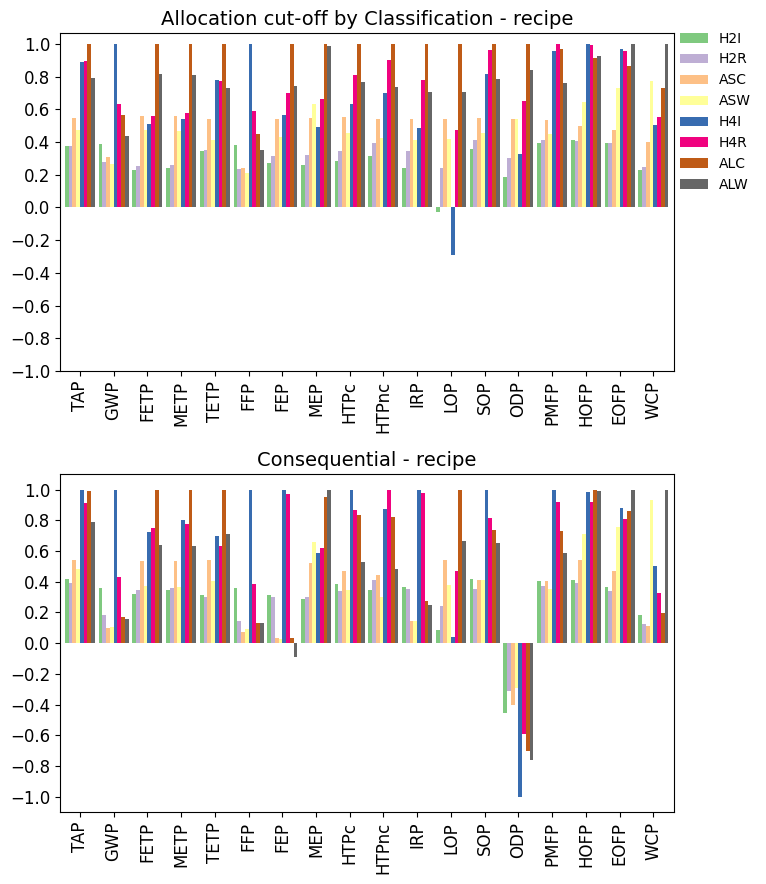

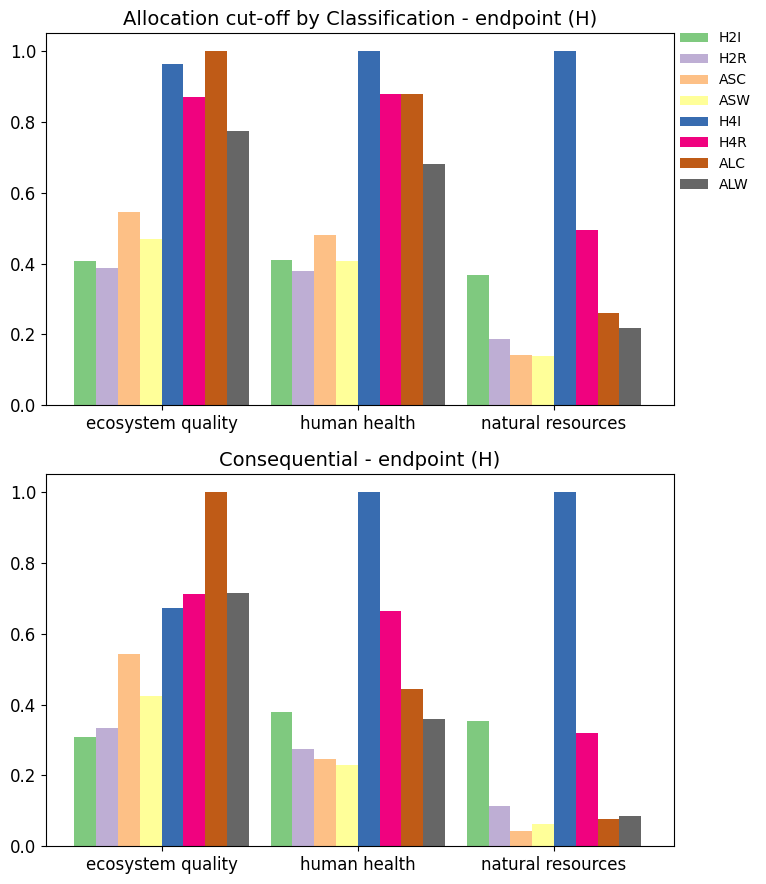

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1


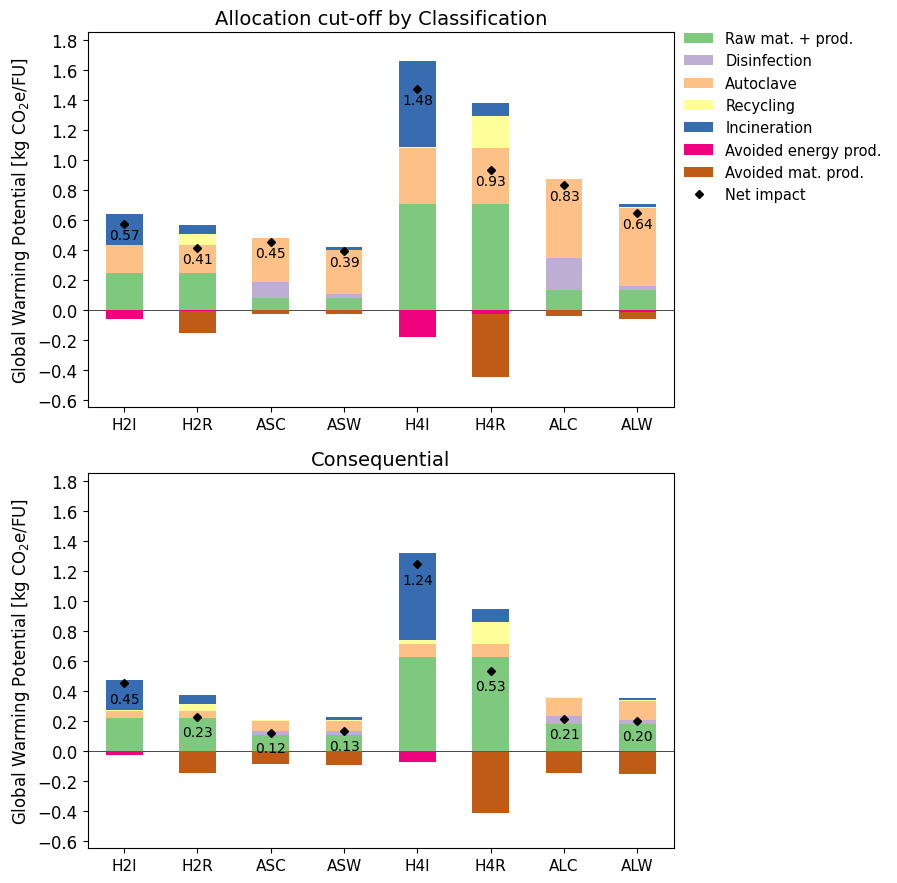

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1


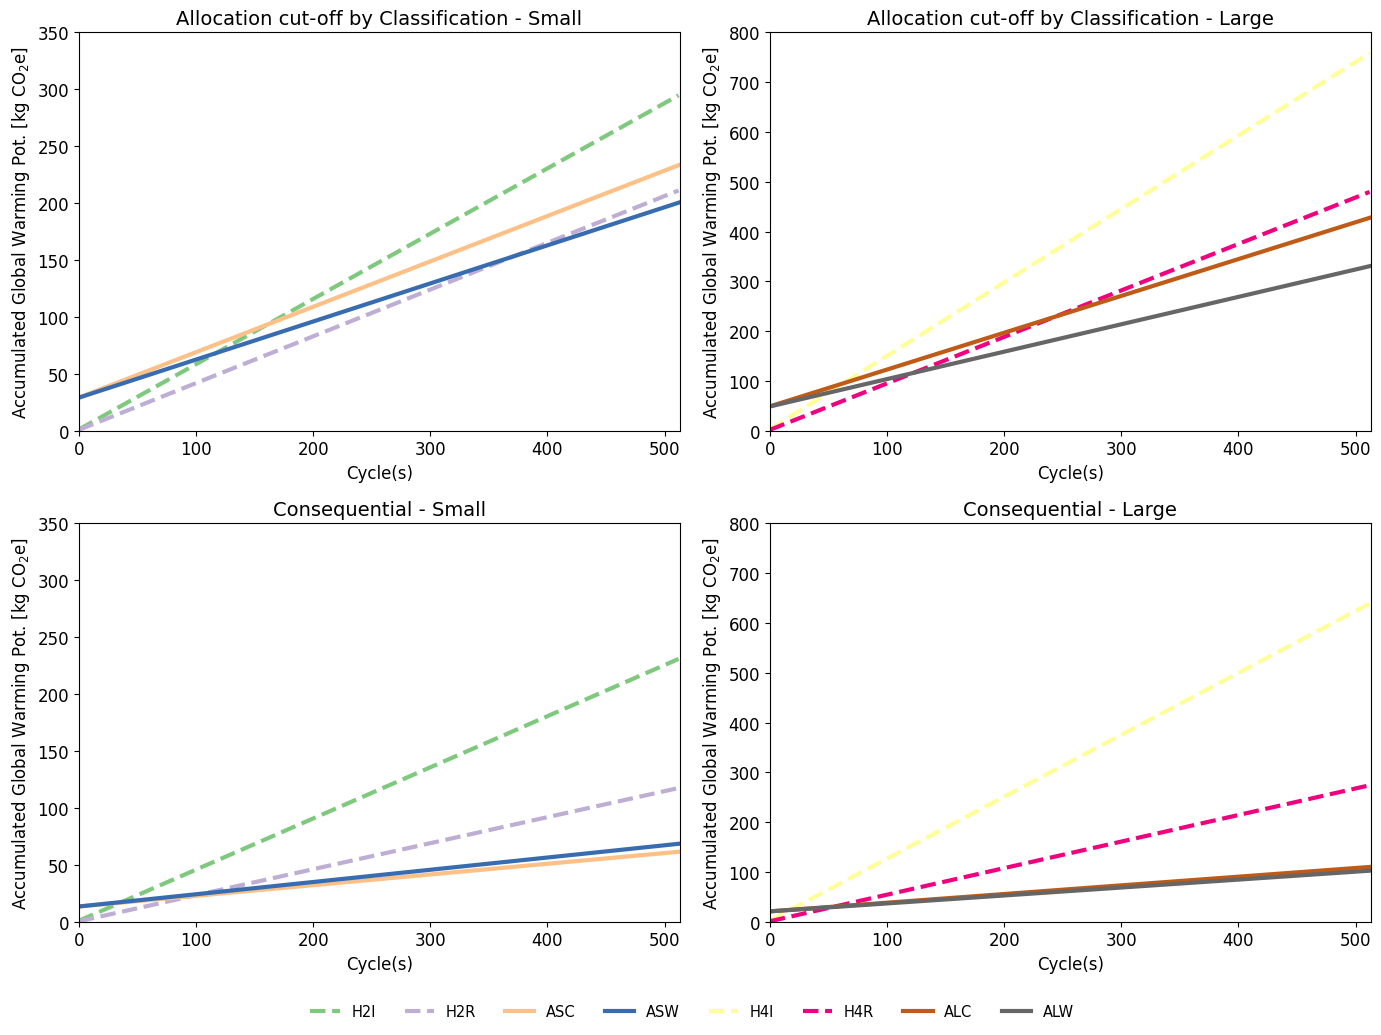

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
Recipe is selected
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 alrea

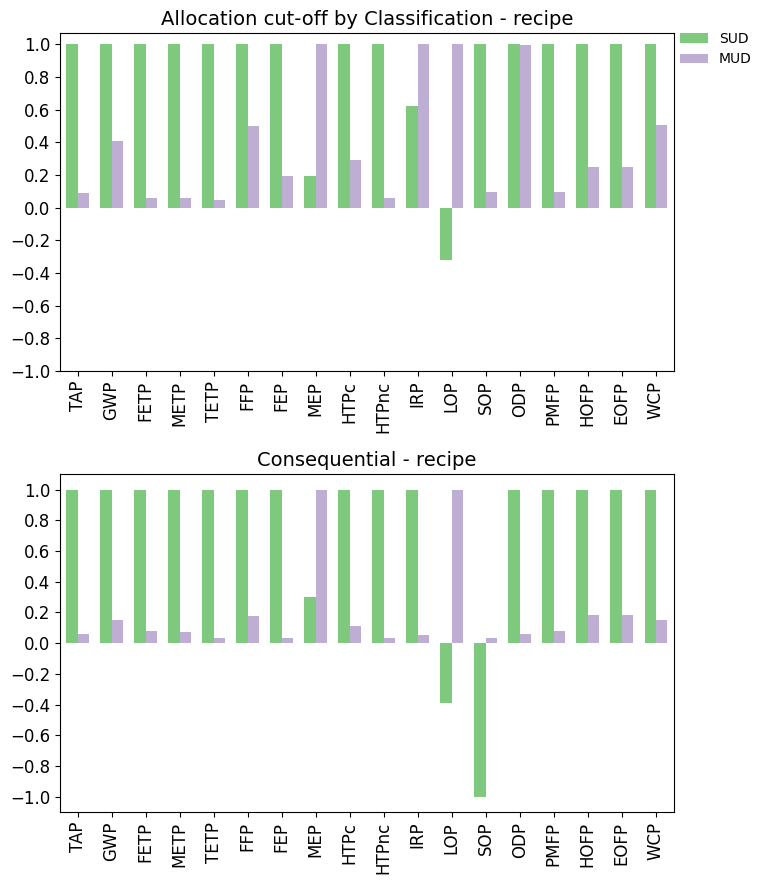

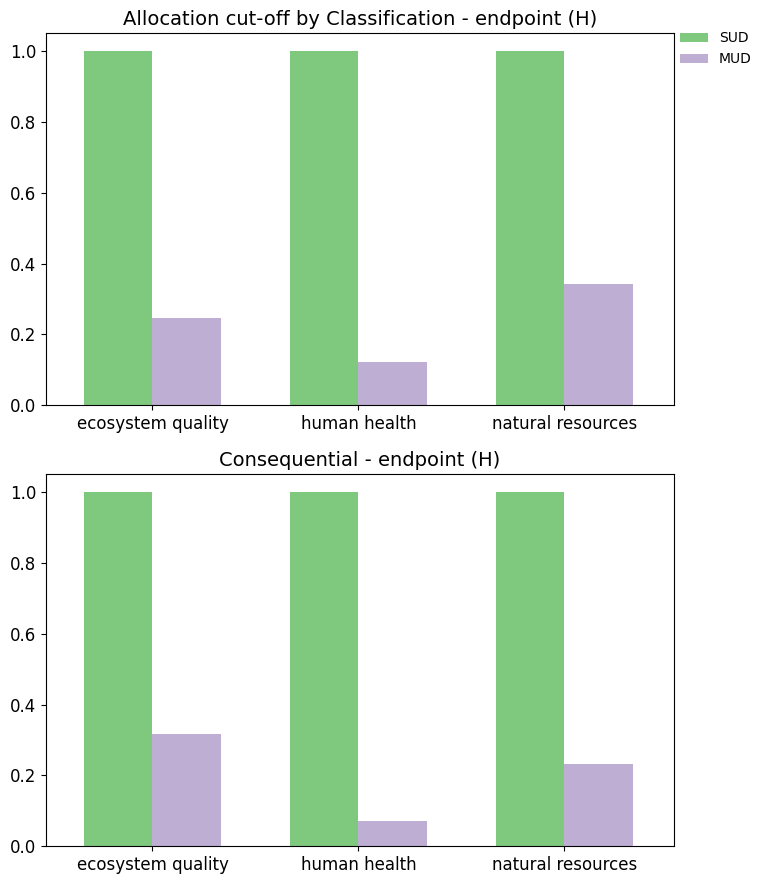

case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2


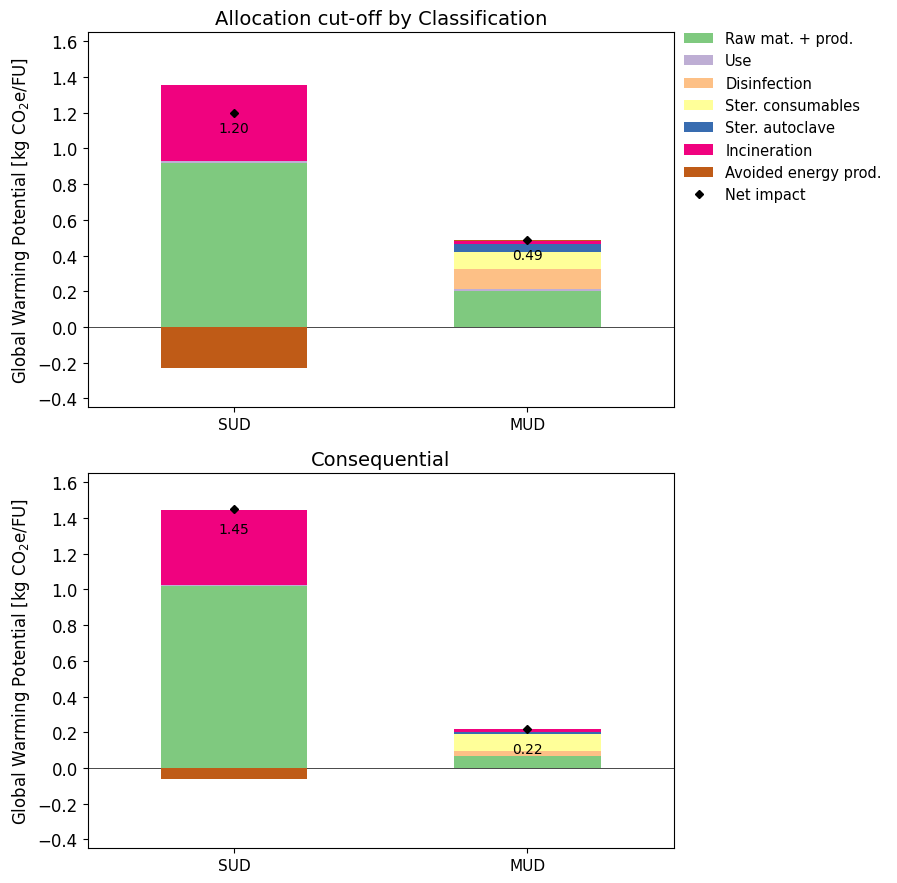

case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2


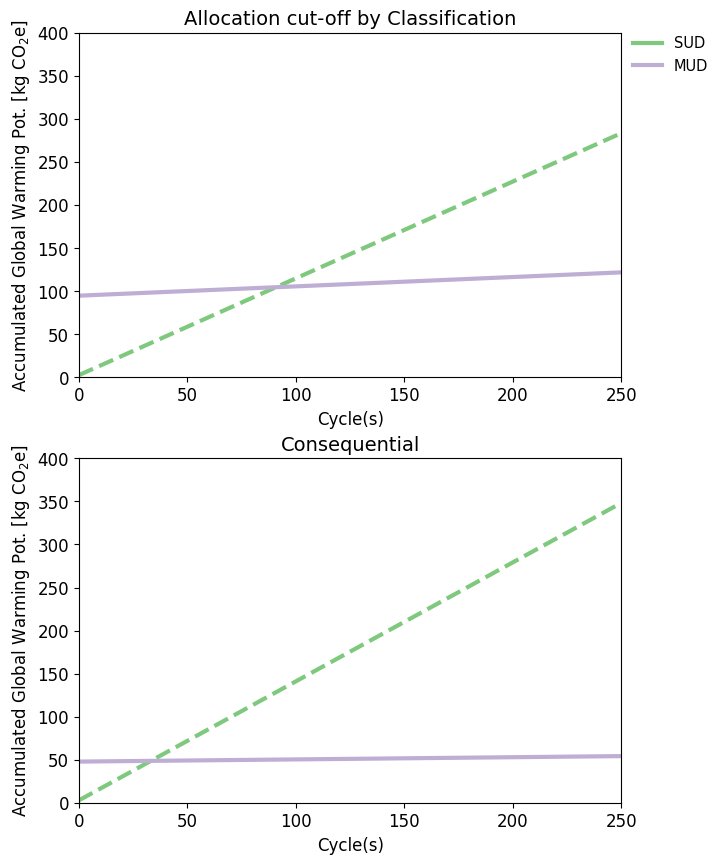

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
Recipe is selected
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 alrea

In [13]:
rl.reload_lib(lib)
path = r'C:/Users/ruw/Desktop'
path_github, ecoinevnt_paths, system_path = s.paths(path)
case = ['case1', 'case2']

for c in case:
    rfig.create_results_figures(c, path_github, ecoinevnt_paths, system_path) # Calculating the results and creating the figures
    lr.break_even_dataframe(path_github, c) # Obtaining when each case for multi use break even to single use
    st.iterative_save_sensitivity_results_to_excel(path_github, c) # Performing the sensitivity analysis